# 1st Task
## Prediction using `Decision Tree` Algorithm


## Define The Problem
It contains five columns namely – **Petal Length, Petal Width, Sepal Length, Sepal Width, and Species** Type. Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded them digitally.

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report

### Data Gathering

In [2]:
# Loading Dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

### Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can see that only `one column has categorical` data and all the other columns are of the numeric type

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Checking Duplicates
df.duplicated().sum()

0

In [7]:
# Checking Missing Values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

we don't found any `missing data` and `duplicated data`

### Data Visualization

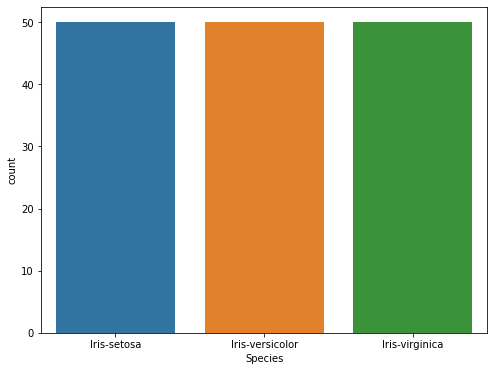

In [8]:
# Visualizing the target column
plt.figure(figsize=(8,6))
sns.countplot(x='Species',data=df)
plt.show()

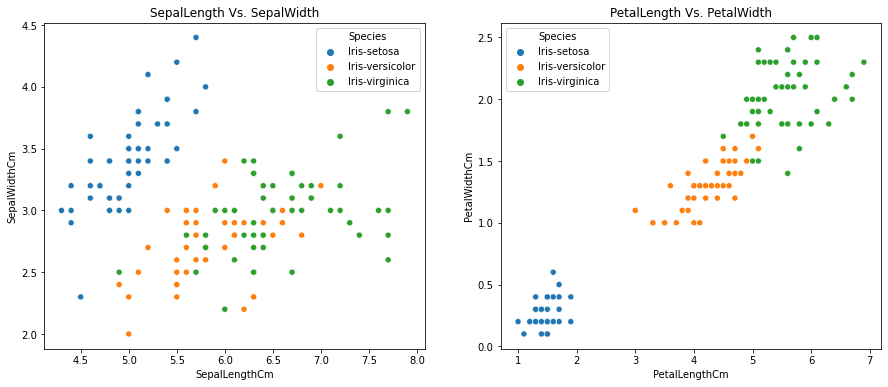

In [9]:
# Relation between variables
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].set_title("SepalLength Vs. SepalWidth")
ax[1].set_title("PetalLength Vs. PetalWidth")
sns.scatterplot(ax=ax[0],x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species')
sns.scatterplot(ax=ax[1],x='PetalLengthCm',y='PetalWidthCm',data=df,hue='Species')
plt.show()

From above plots we can infer that
    
    1-Iris Setosa has smaller "SepalLength","PetalLength" and "PetalWidth" but larger "SepalWidth"
    
    2-Iris Versicolor lies in the middle of the other two species in terms of "SepalLength","SepalWidth" and also       
      lies in the middle of the other two species in term of "PetalLength","PetalWidth".
    
    3-Iris Virginica has larger "SepalWidth" but smaller "SepalLength" and the largest of "PetalLength","PetalWidth"
 

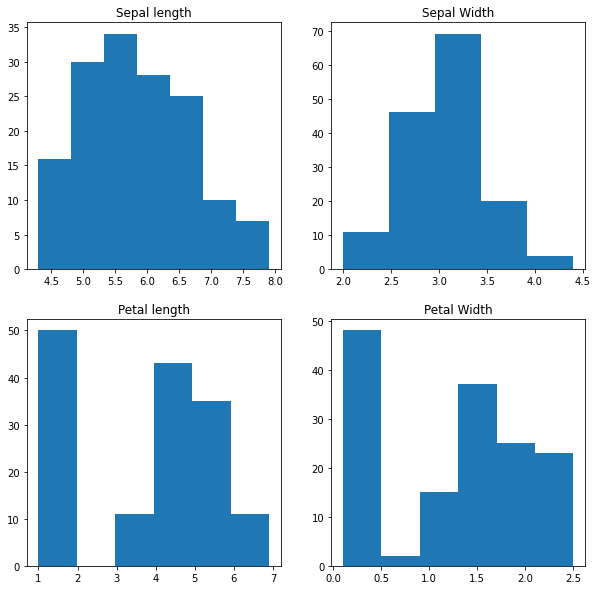

In [10]:
fig ,ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].set_title("Sepal length")
ax[0,0].hist(df['SepalLengthCm'],bins=7)

ax[0,1].set_title("Sepal Width")
ax[0,1].hist(df['SepalWidthCm'],bins=5)

ax[1,0].set_title("Petal length")
ax[1,0].hist(df['PetalLengthCm'],bins=6)

ax[1,1].set_title("Petal Width")
ax[1,1].hist(df['PetalWidthCm'],bins=6)

plt.show()

From the above plot

    - the highest frequency of "SepalLength" is between 5.5 and 6.0
    - the highest frequency of "SepalWidth" is between 3.0 and 3.5
    - the highest frequency of "PetalLength" is between 1.0 and 2.0 
    - the highest frequency of "PetalWidth" is between 0.0 and 0.5

So we can use **Petal Length** and **Petal Width** as the classification feature.

In [11]:
# Handling Correlation
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

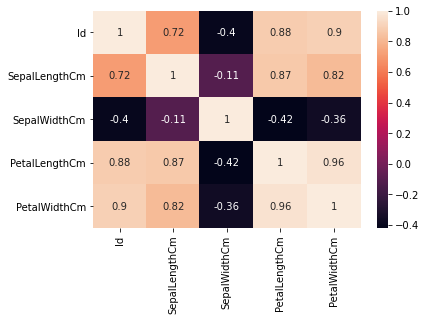

In [12]:
sns.heatmap(df.corr(),annot=True)

From the above graph

    - "SepalLength" has a good correlation with a both of "PetalLength" and "PetalWidth" 
    - "PetalLength" and "PetalWidth" have good correlation

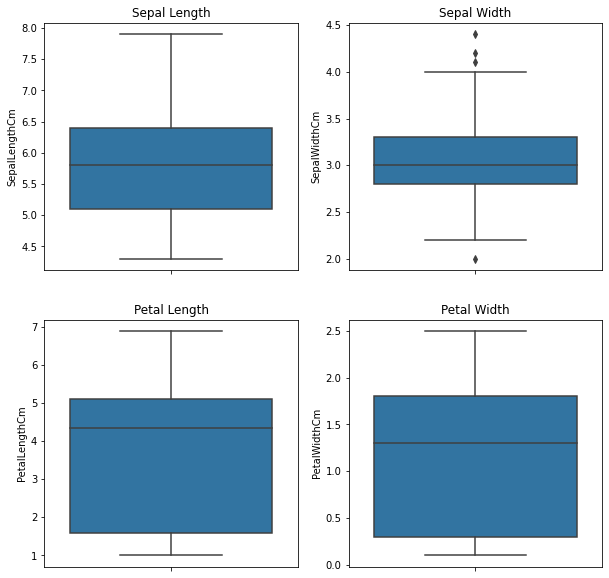

In [13]:
# Handleing Outliers
fig , ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].set_title("Sepal Length")
sns.boxplot(ax=ax[0,0],y=df['SepalLengthCm'])

ax[0,1].set_title("Sepal Width")
sns.boxplot(ax=ax[0,1],y=df['SepalWidthCm'])

ax[1,0].set_title("Petal Length")
sns.boxplot(ax=ax[1,0],y=df['PetalLengthCm'])

ax[1,1].set_title("Petal Width")
sns.boxplot(ax=ax[1,1],y=df['PetalWidthCm'])

plt.show()

There are some outliers in **"SepalWidth"**

In [14]:
# Remove the Outliers
# Detect Outliers
Q1 = np.percentile(df['SepalWidthCm'],25,interpolation = 'midpoint')
Q3 = np.percentile(df['SepalWidthCm'],75,interpolation = 'midpoint')

IQR = Q3 - Q1
print("Old Shape: ", df.shape)

upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))
# Removing Outliers
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)

print("New Shape: ", df.shape)


Old Shape:  (150, 6)
New Shape:  (146, 6)


In [15]:
# Handle Categorical Data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['Species'])
df['Species'] = encoder.transform(df['Species'])

In [16]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [17]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Spliting Data

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
print("Shape of Train data :",X_train.shape , y_train.shape)
print("Shape of Test data :",X_test.shape , y_test.shape)

Shape of Train data : (102, 4) (102,)
Shape of Test data : (44, 4) (44,)


### Model Selection
#### Choose `DecisionTreeClassifier`  as Algorithm

In [20]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('dtree', DecisionTreeClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter
parameters = {'dtree__criterion' :['gini','entropy'],
              'dtree__max_depth':range(2,9),
              'dtree__min_samples_leaf':[.1,.15,.2,.3]}

# Instantiate the GridSearchCV
cv = GridSearchCV(pipeline,parameters,cv=5)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9545454545454546
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        16

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44

Tuned Model Parameters: {'dtree__criterion': 'gini', 'dtree__max_depth': 2, 'dtree__min_samples_leaf': 0.1}


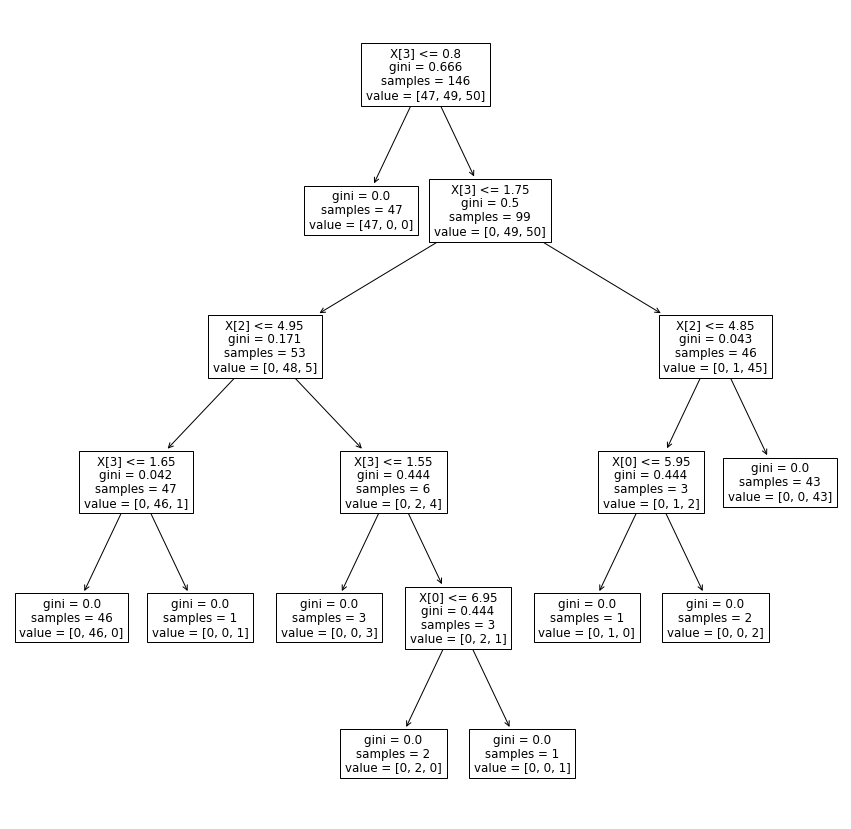

In [21]:
from sklearn import tree
plt.figure(figsize=(15,15))
dtree = DecisionTreeClassifier()
dtree.fit(X,y)
tree.plot_tree(dtree)
plt.show()